# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [20]:
# Initial imports
import os
import pandas as pd
import nltk
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [27]:
# Read your api key environment variable
# YOUR CODE HERE!
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
load_dotenv()
api_key = os.getenv("news_api_key")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaggatjt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jaggatjt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaggatjt/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q = "bitcoin", language = "en")
# Show the total number of news
print(f"Total Results: {btc_news['totalResults']}")


Total Results: 9348


In [5]:
btc_news['articles']

[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Justine Calma',
  'title': 'Tesla’s $1.5 billion bitcoin purchase clashes with its environmental aspirations',
  'description': 'Tesla announced this week that it purchased $1.5 billion in bitcoin and plans to accept bitcoin as payment in the future. CEO Elon Musk might have boosted bitcoin’s credibility. But greenhouse gas emissions from bitcoin are on the rise as the price of the cry…',
  'url': 'https://www.theverge.com/2021/2/9/22275243/teslas-bitcoin-purchase-clashes-climate-change-mission',
  'urlToImage': 'https://cdn.vox-cdn.com/thumbor/eQST6cDSwG_MASzsxTUv3igFdxU=/0x430:6000x3571/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22293241/1231048263.jpg',
  'publishedAt': '2021-02-09T23:10:46Z',
  'content': 'Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via G

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ether_news = newsapi.get_everything(q = "ethereum", language = "en")
# Show the total number of news
print(f"Total Results: {ether_news['totalResults']}")


Total Results: 1923


In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
btc_df = pd.DataFrame.from_dict(btc_news['articles'])
btc_df = btc_df.drop(columns = ['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt'])
btc_df.head()

,content
0,"Tesla, led by Elon Musk, confirmed that it pur..."
1,"For a brief moment on Sunday, before Tesla sai..."
2,Twitter and Square CEO Jack Dorsey and rapper ...
3,When Bitcoin first appeared out of digital thi...
4,None


In [9]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
text_sent = {
    'text_compound':[],
    'text_pos':[],
    'text_neu':[],
    'text_neg':[],
    'text_sent':[],
}

for index, row in btc_df.iterrows():
    try:         
        text_sentiment = analyzer.polarity_scores(row['content'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
        text_sent['text_sent'].append(text_sentiment['compound'])
        
    except AttributeError:
        pass

In [10]:
text_sentiment_df = pd.DataFrame(text_sent)

btc_df = btc_df.reset_index()
btc_df = btc_df.join(text_sentiment_df)
btc_df.head()

,index,content,text_compound,text_pos,text_neu,text_neg,text_sent
0,0,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.929,0.000,0.3818
1,1,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.962,0.038,-0.1027
2,2,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.944,0.000,0.2500
3,3,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.916,0.032,0.1779
4,4,None,0.6369,0.113,0.887,0.000,0.6369


In [11]:
ether_df = pd.DataFrame.from_dict(ether_news['articles'])
ether_df = ether_df.drop(columns = ['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt'])
ether_df.head()

,content
0,Worried that the GeForce RTX 3060 will be sold...
1,NFTs are the latest cryptocurrency rage these ...
2,NFTs (non-fungible tokens) — or scarce digital...
3,While the first Christie's auction of digital ...
4,Attempting to get ahead of cryptocurrency mine...


In [13]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
text_sent = {
    'text_compound':[],
    'text_pos':[],
    'text_neu':[],
    'text_neg':[],
    'text_sent':[],
}

for index, row in ether_df.iterrows():
    try:         
        text_sentiment = analyzer.polarity_scores(row['content'])
        text_sent['text_compound'].append(text_sentiment['compound'])
        text_sent['text_pos'].append(text_sentiment['pos'])
        text_sent['text_neu'].append(text_sentiment['neu'])
        text_sent['text_neg'].append(text_sentiment['neg'])
        text_sent['text_sent'].append(text_sentiment['compound'])
        
    except AttributeError:
        pass

In [14]:
text_sentiment_df = pd.DataFrame(text_sent)

ether_df = ether_df.reset_index()
ether_df = ether_df.join(text_sentiment_df)
ether_df.head()

,index,content,text_compound,text_pos,text_neu,text_neg,text_sent
0,0,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.818,0.119,-0.3400
1,1,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.789,0.145,-0.4588
2,2,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.909,0.000,0.4404
3,3,While the first Christie's auction of digital ...,0.0258,0.030,0.970,0.000,0.0258
4,4,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.856,0.000,0.7096


In [15]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,index,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.00000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.50000,0.255867,0.071722,0.859944,0.012722,0.255867
std,5.91608,0.329365,0.066116,0.222711,0.026797,0.329365
min,0.00000,-0.381800,0.000000,0.000000,0.000000,-0.381800
25%,4.75000,0.000000,0.010500,0.863250,0.000000,0.000000
50%,9.50000,0.213950,0.061000,0.914000,0.000000,0.213950
75%,14.25000,0.480525,0.110000,0.952250,0.000000,0.480525
max,19.00000,0.831600,0.246000,1.000000,0.082000,0.831600


In [16]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ether_df.describe()

,index,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,9.50000,0.221575,0.073350,0.907450,0.019200,0.221575
std,5.91608,0.374861,0.065991,0.074156,0.043104,0.374861
min,0.00000,-0.458800,0.000000,0.754000,0.000000,-0.458800
25%,4.75000,0.000000,0.000000,0.861750,0.000000,0.000000
50%,9.50000,0.296000,0.068500,0.909000,0.000000,0.296000
75%,14.25000,0.513400,0.116500,0.977500,0.000000,0.513400
max,19.00000,0.831600,0.246000,1.000000,0.145000,0.831600


### Questions:

Q: Which coin had the highest mean positive score?

   btc had the highest mean positive score of 0.071722

Q: Which coin had the highest compound score?

   ethereum had the highest compound score of 0.83160

Q. Which coin had the highest positive score?

   ethereum had the highest positive score of 0.246

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [22]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
wnl = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

In [42]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens    
btc_df.head()

,index,content,text_compound,text_pos,text_neu,text_neg,text_sent
0,0,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.929,0.000,0.3818
1,1,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.962,0.038,-0.1027
2,2,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.944,0.000,0.2500
3,3,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.916,0.032,0.1779
4,4,None,0.6369,0.113,0.887,0.000,0.6369


In [50]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_df = btc_df.dropna()
btc_df['tokens'] = btc_df['content'].apply(tokenizer)
btc_df.head()

,index,content,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,0,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.929,0.000,0.3818,"[Tesla, led, Elon, Musk, confirmed, purchased,..."
1,1,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.962,0.038,-0.1027,"[brief, moment, Sunday, Tesla, said, invested,..."
2,2,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.944,0.000,0.2500,"[Twitter, Square, CEO, Jack, Dorsey, rapper, J..."
3,3,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.916,0.032,0.1779,"[Bitcoin, first, appeared, digital, thin, air,..."
5,5,Some things are best left a mystery at least a...,0.0000,0.000,1.000,0.000,0.0000,"[thing, best, left, mystery, least, far, Coinb..."


In [51]:
print(type(btc_df['content']))

<class 'pandas.core.series.Series'>


In [52]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ether_df = ether_df.dropna()
ether_df['tokens'] = ether_df['content'].apply(tokenizer)
ether_df.head()

,index,content,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,0,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.818,0.119,-0.3400,"[Worried, GeForce, RTX, 3060, sold, cryptocurr..."
1,1,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.789,0.145,-0.4588,"[NFTs, latest, cryptocurrency, rage, day, band..."
2,2,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.909,0.000,0.4404,"[NFTs, non-fungible, token, —, scarce, digital..."
3,3,While the first Christie's auction of digital ...,0.0258,0.030,0.970,0.000,0.0258,"[first, Christie, auction, digital, artwork, b..."
4,4,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.856,0.000,0.7096,"[Attempting, get, ahead, cryptocurrency, miner..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [53]:
from collections import Counter
from nltk import ngrams

In [54]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(articles): 
    big_string = 'btc'.join(articles)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns = ['bigram', 'count'])

In [55]:
bigram_counter(btc_df['content'])

,bigram,count
0,"(1.5, billion)",2
1,"(billion, bitcoin)",2
2,"(Jay, Z)",2
3,"(Feb., 9)",2
4,"(9, 2021)",2
5,"(2021, 8:01)",2
6,"(8:01, a.m)",2
7,"(a.m, ET)",2
8,"(all-time, high)",2
9,"(Daily, Crunch)",2


In [56]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bigram_counter(ether_df['content'])

,bigram,count
0,"(char, btcBy)",5
1,"(btcBy, Reuters)",5
2,"(Reuters, Staff)",5
3,"(record, high)",4
4,"(char, btcNEW)",4
5,"(btcNEW, YORK)",4
6,"(Reuters, Cryptocurrencies)",3
7,"(Staff, SINGAPORE)",3
8,"(RTX, 3060)",2
9,"(cryptocurrency, miner)",2


In [57]:
# Use the token_count function to generate the top 10 words from each coin
def word_counter(corpus): 
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns = ['word', 'count'])

In [58]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
word_counter(btc_df['content'])

,word,count
0,char,15
1,bitcoin,6
2,Bitcoin,6
3,cryptocurrency,5
4,Tesla,4
5,…,4
6,2021,4
7,said,3
8,Dorsey,3
9,Elon,2


In [59]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
word_counter(ether_df['content'])

,word,count
0,char,20
1,Reuters,14
2,cryptocurrency,9
3,Ethereum,8
4,week,7
5,…,5
6,Staff,5
7,high,5
8,new,4
9,digital,4


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

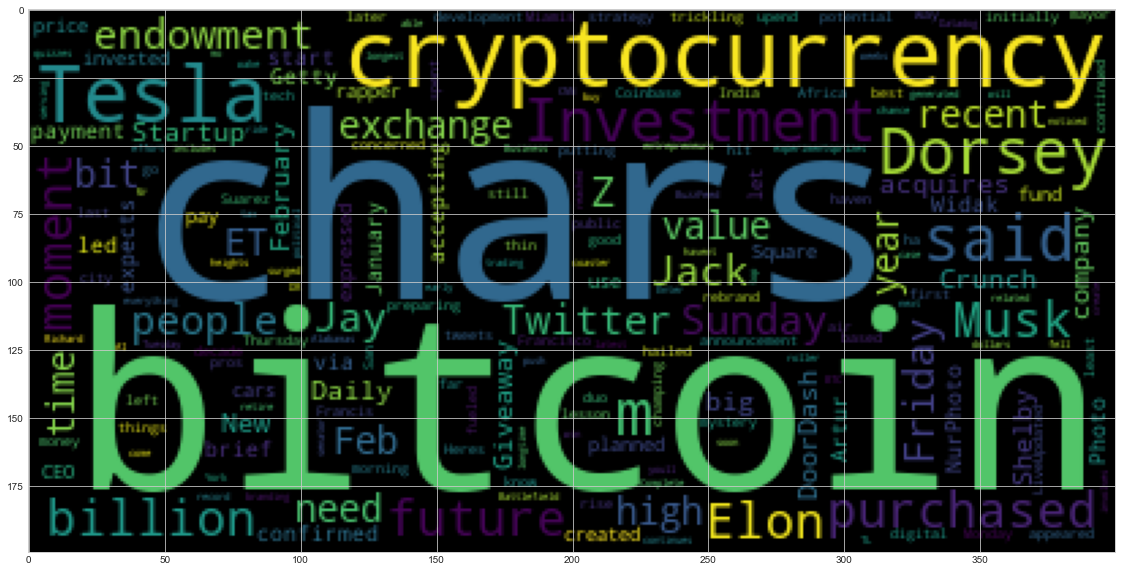

In [62]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_big_string = ' '.join(btc_df['content'])
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

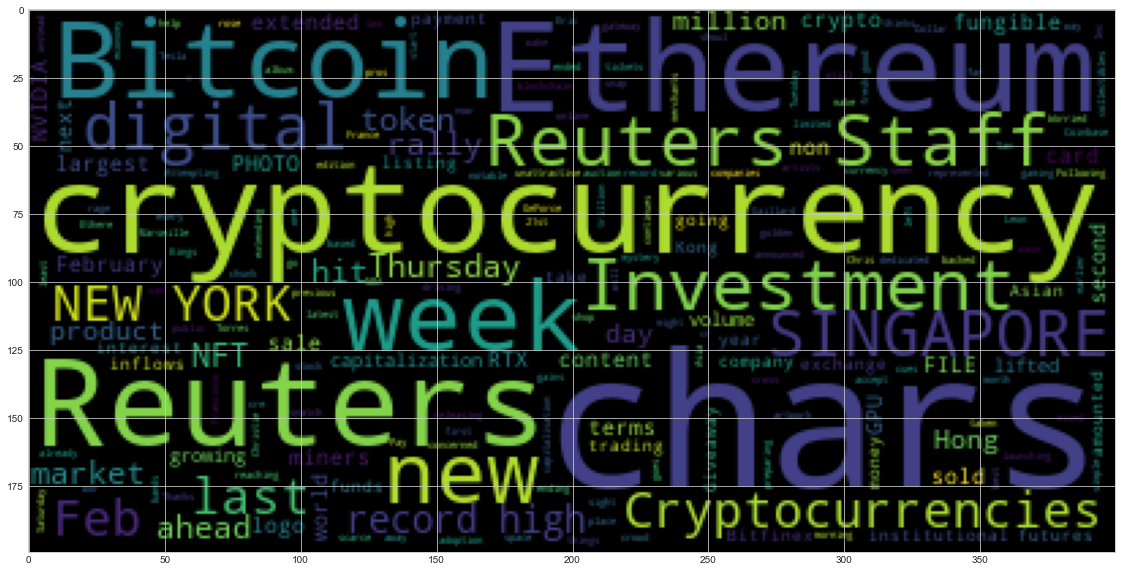

In [63]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_big_string = ' '.join(ether_df['content'])


eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [65]:
import spacy
from spacy import displacy

In [68]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 8.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [69]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [70]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_big_string

"Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars] For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars] Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars] When Bitcoin first appeared out of digital thin air, it was hailed as having the potential to upend the way people spent money. But more than a decade later, cryptocurrency is still only trickling in… [+2039 chars] Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange h

In [71]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin = nlp(btc_big_string)
# Add a title to the document
# YOUR CODE HERE!
bitcoin.user_data['title'] = 'Bitcoin NER'

In [72]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin, style = 'ent')

In [73]:
# List all Entities
# YOUR CODE HERE!
print(bitcoin.ents)

(Elon Musk, about $ 1.5 billion, January, Artur, Widak, NurPhoto, Sunday, Tesla, $1.5 billion, Jack Dorsey, Jay Z, Africa, India, Dorsey, Friday, 500, first, more than a decade later, Coinbase, San Francisco, last year, Thursday, Feb. 9, 2021, 8:01 a.m., Feb. 9, 2021, 8:01 a.m., Bitcoin, Teslas, Monday, 1.5, this morning, over $50,000, Francis Suarez, Jack Dorsey, Jay Z, Datadog, Startup Battlefield, BuzzFeed, AI, Daily Crunch, February 12, 2021, Bitcoins, recent weeks, Friday, over $12,000, New York, CNN, above $58,000, Sunday, just above $46,000, Tuesday, 6, Alabamas, Richard Shelby, next year, Shelby, 86, seventh, DoorDash, Tesla, Daily Crunch, February 8, 2021, DoorDash, Blockchain.com, $120 million, Moore Strategic Ventu)


---

## Ethereum NER

In [74]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_big_string

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars] Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week,

In [67]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum = nlp(eth_big_string)
# Add a title to the document
# YOUR CODE HERE!
ethereum.user_data['title'] = 'Ethereum NER'

In [68]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum, style = 'ent')

In [71]:
# List all Entities
# YOUR CODE HERE!
print(ethereum.ents)

(The Complete Stock and Cryptocurrency Investment Toolkit Bundle, 29.46, Sept. 7, 97%, September, 18, 2020, 6 min, five years ago, Ethereum, ETH, September, 30, 2020, 8, half, 2020, Satoshi Nakaboto, Bitcoin, Bitcoin, Today, Satoshi Nakaboto, Bitcoin, US, Donald Trump, First, Lady Melania Trump, the White House, July 7, 2020, JIM WATSON, Getty Images, Friday, Bitcoin, Bitcoins, SuperRare, SuperRare, GuoImage, Chandler Guo, one, Chandler Guo, SEC, OCC, fiat, yesterday, fiat, this year, Satoshi Nakaboto, Bitcoin, Bitcoin, Today, Satoshi Nakaboto, Bitcoin, Yuriko Nakao, Yesterday, today, Bitcoin, $100 million, Deloitte, KPMG, Fidelity, $100 milli, Uniswap, 400, UNI, September 1, twenty dollars, May, bitcoin, DeFi, DeFi, 458,000, September 25, Shaun Fernando, September 15, 2020, the night, USD, the night, On The Case
, Reuters, U.S., Wednesday)
